In [12]:
import csv
import os

import math
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Basic Averages

In [15]:
# Load Data
data = {}
for (root, dirs, file) in os.walk("../all_features"):
    for f in file:
        if ".csv" in f:
            path = root + "/" + f
            df = pd.read_csv(path)
            data[f] = df

In [16]:
# Assuming you have a list of dataframes for all participants
dataframes = data.values()

# Calculate the average for each column across all dataframes
average_df = pd.concat(dataframes).groupby(level=0).mean()
std_df = pd.concat(dataframes).groupby(level=0).std()

In [19]:
data["91-001_part_2_concat.csv"].describe()

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,frame,face_id,timestamp,confidence,success,openface_AU01_r,openface_AU02_r,...,libreface_AU04_i,libreface_AU05_i,libreface_AU06_i,libreface_AU09_i,libreface_AU012_i,libreface_AU015_i,libreface_AU017_i,libreface_AU020_i,libreface_AU025_i,libreface_AU026_i
count,5762.000000,5762.000000,5762.000000,5762.000000,5762.0,5762.000000,5762.000000,5762.0,5762.000000,5762.000000,...,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000,5762.000000
mean,2880.500000,2880.500000,2880.500000,2881.500000,0.0,94.620000,0.979436,1.0,0.399538,0.117930,...,0.110318,0.049893,0.041805,0.073084,0.259076,0.032426,0.042583,0.050891,0.450129,0.050078
std,1663.490457,1663.490457,1663.490457,1663.490457,0.0,54.643106,0.005975,0.0,0.044390,0.069635,...,0.038915,0.004851,0.006467,0.018778,0.041872,0.003757,0.004633,0.005219,0.048096,0.008454
min,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.880000,1.0,0.280000,0.000000,...,0.031440,0.031338,0.019936,0.028794,0.085355,0.020268,0.025620,0.031974,0.166878,0.027093
25%,1440.250000,1440.250000,1440.250000,1441.250000,0.0,47.310000,0.980000,1.0,0.370000,0.070000,...,0.080542,0.047063,0.037749,0.061152,0.232471,0.029805,0.039385,0.047590,0.421654,0.044582
50%,2880.500000,2880.500000,2880.500000,2881.500000,0.0,94.620000,0.980000,1.0,0.394000,0.114000,...,0.099544,0.050141,0.041464,0.071694,0.261277,0.032525,0.042612,0.050939,0.451042,0.048706
75%,4320.750000,4320.750000,4320.750000,4321.750000,0.0,141.930000,0.980000,1.0,0.426000,0.158000,...,0.135931,0.053228,0.045314,0.081621,0.288622,0.034935,0.045218,0.054132,0.480085,0.054419
max,5761.000000,5761.000000,5761.000000,5762.000000,0.0,189.240000,0.980000,1.0,0.676000,0.828000,...,0.287693,0.071691,0.082346,0.193912,0.433692,0.052747,0.066317,0.070947,0.593649,0.106119


In [ ]:
ax = average_df.plot(kind='line', y=["openface_AU01_r", "libreface_AU01_i", "libreface_AU01_d", "me_graph_AU1"], subplots=False)

# Add the std as a transparent border
for column in ["openface_AU01_r", "libreface_AU01_i","libreface_AU01_d", "me_graph_AU1"]:
    ax.fill_between(average_df.index, 
                    average_df[column] - std_df[column], 
                    average_df[column] + std_df[column], 
                    alpha=0.2)
    
plt.title("Average intensity values over all participants (AU1)")
plt.xlabel("frame")
plt.show()

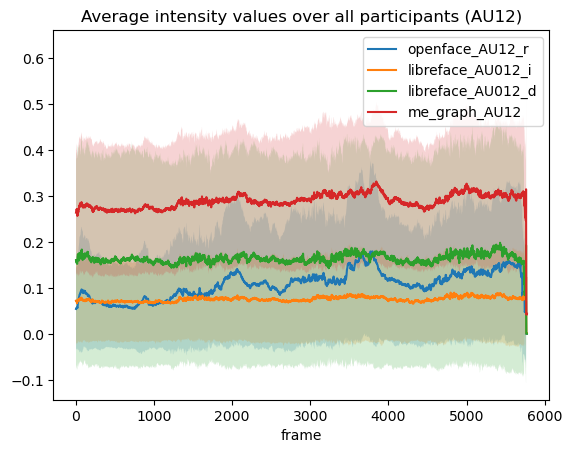

In [17]:
ax = average_df.plot(kind='line', y=["openface_AU12_r", "libreface_AU012_i", "libreface_AU012_d", "me_graph_AU12"], subplots=False)

# Add the std as a transparent border
for column in ["openface_AU12_r", "libreface_AU012_i", "libreface_AU012_d", "me_graph_AU12"]:
    ax.fill_between(average_df.index, 
                    average_df[column] - std_df[column], 
                    average_df[column] + std_df[column], 
                    alpha=0.2)

plt.title("Average intensity values over all participants (AU12)")
plt.xlabel("frame")
plt.show()

Text(0.5, 0, 'frame')

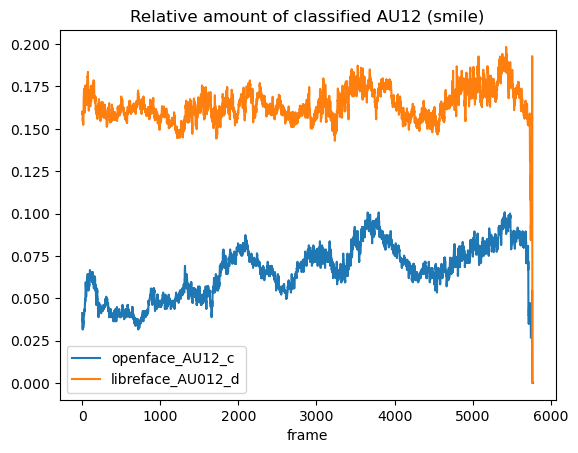

In [13]:
## -- only activated
ax = average_df.plot(kind='line', y=["openface_AU12_c", "libreface_AU012_d"], subplots=False)
plt.title("Relative amount of classified AU12 (smile)")
plt.xlabel("frame")

## ASC vs. Neurotypical

In [2]:
# rename participant ids to their corresponting datafrmae name
participant_info_df = pd.read_csv("../participant_info.csv")
participants = {}

participants = participant_info_df.set_index('id')['ASC'].to_dict()

for k in list(participants.keys()):
    new_key = k + "_concat.csv"
    participants[new_key] = participants.pop(k)

In [3]:
# Load Data
data = {}
asc_data = []
typ_data = []

for (root, dirs, file) in os.walk("../all_features"):
    for f in file:
        if ".csv" in f:
            path = root + "/" + f
            df = pd.read_csv(path)
            data[f] = df
            
            if f in participants.keys():
                if participants[f] == 0:
                    typ_data.append(df)
                elif participants[f] == 1:
                    asc_data.append(df)
                else:
                    print("Not 0 or 1: ", f)

In [5]:
# Calculate the average for each column across all dataframes
asc_mean = pd.concat(asc_data).groupby(level=0).mean()
asc_std = pd.concat(asc_data).groupby(level=0).std()

nt_mean = pd.concat(typ_data).groupby(level=0).mean()
nt_std = pd.concat(typ_data).groupby(level=0).std()

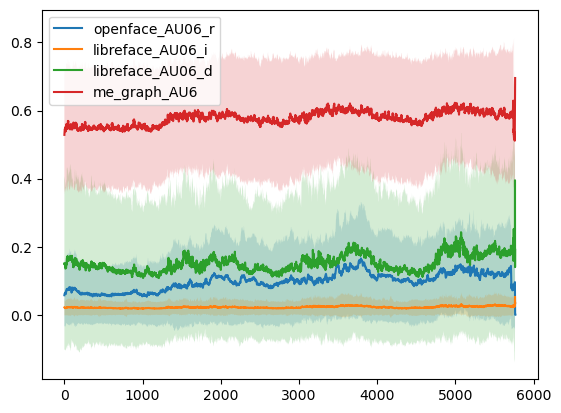

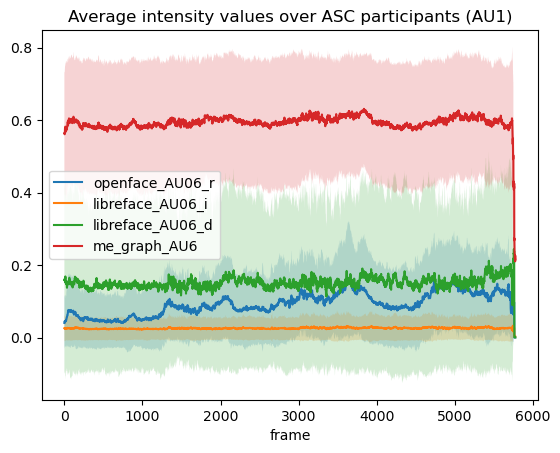

In [11]:
# AU to compare
au = ["openface_AU06_r", "libreface_AU06_i", "libreface_AU06_d", "me_graph_AU6"]

ax_asc = asc_mean.plot(kind='line', y=au, subplots=False)

# Add the std as a transparent border
for column in au:
    ax_asc.fill_between(asc_std.index, 
                    asc_mean[column] - asc_std[column], 
                    asc_mean[column] + asc_std[column], 
                    alpha=0.2)
    
ax_nt = nt_mean.plot(kind='line', y=au, subplots=False)

# Add the std as a transparent border
for column in au:
    ax_nt.fill_between(nt_std.index, 
                    nt_mean[column] - nt_std[column], 
                    nt_mean[column] + nt_std[column], 
                    alpha=0.2)
    
plt.title("Average intensity values over ASC participants (AU6)")
plt.xlabel("frame")
plt.show()